# Voorbeeld vragen Deeltoets 2 Data Science

Hieronder een aantal voorbeeld vragen op de titanic dataset.


1.  five different ways to find out how many men and women there were on board
2. Hoeveel mensen zaten er per gesclacht in elke klasse? Minstens 2 oplossingen, liever 3.
    * Welk deel daarvan heeft de ramp overleefd? 
    * Doe dit eerst met behulp van je oplossing op de vorige vraag en daarna direct.
3.  Wat is de gemiddelde en mediaan leeftijd per geslcaht van mensen die het overleefd hebben en mensen die het niet hebben>
5. Beschrijf de relatie tussen de variablene class en pclass.  
6. Wanneer precies is de variabele `adult_male` waar?
4. Maak de functie `teldeletters(bestand)` die 
    '''Telt hoe vaak elke letter voorkomt in bestand en toont dat als een pandas series omgekeerd geordend
    op het aantal voorkomens.'''
    * Maak het zo dat je functie elke regel in het bestand maar 1 keer leest, en NIET het hele bestand inleest (of als het een compressed bestand is, eerst uitpakt).
7. Open het bestand met de songteksten van prince.
    1. Hoeveel nummers bevatten het woord _sex_ (met of zonder hoofdletter)?
    2. Hoeveel nummers beginnen me dat woord?
    3. Hoeveel nummers bevatten een woord dat _sex_ bevat maar niet gelijk is een _sex_ (dus _sexy_ wel maar _sex_ niet).
    4. Print al die woorden uit die _sex_ bevatten.
    5. Vindt alle woorden in zijn songs die bestaan uit gewone letters en andere tekens (iets als U2 of 4U).
    6. Geef voor elke song het percentage klinkers van de gehele songlengte

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Voorbeeld-vragen-Deeltoets-2-Data-Science" data-toc-modified-id="Voorbeeld-vragen-Deeltoets-2-Data-Science-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Voorbeeld vragen Deeltoets 2 Data Science</a></span></li><li><span><a href="#Antwoorden" data-toc-modified-id="Antwoorden-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Antwoorden</a></span></li><li><span><a href="#prince-lyrics" data-toc-modified-id="prince-lyrics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>prince lyrics</a></span><ul class="toc-item"><li><span><a href="#Baby-names" data-toc-modified-id="Baby-names-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Baby names</a></span></li></ul></li></ul></div>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [2]:
print(titanic.shape)
titanic.head()

(891, 15)


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

# Antwoorden

In [3]:
# five different ways to find out how many men and women there were on board
titanic.sex.value_counts()
titanic.groupby('sex')['survived'].count()
{s:titanic[titanic.sex==s].sex.count() for s in titanic.sex.unique()}
titanic.pivot_table(index='sex', values='survived', aggfunc=len)
pd.crosstab(titanic.sex,titanic.survived).sum(axis=1)

sex
female    314
male      577
dtype: int64

In [4]:
# Hoeveel mensen zaten er per gesclacht in elke klasse?
# Welk deel daarvan heeft de ramp overleefd? 
# Doe dit eerst met behulp van je oplossing op de vorige vraag en daarna direct.

# 1
(titanic.pivot_table(index='sex', columns='class', values='survived', aggfunc=sum)/
titanic.pivot_table(index='sex', columns='class', values='survived', aggfunc=len)
)
#2 
titanic.pivot_table(index='sex', columns='class', values='survived')

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [5]:
pd.crosstab(titanic.sex,titanic['class'])

class   First  Second  Third
sex                         
female     94      76    144
male      122     108    347

In [6]:
# Wat is de gemiddelde en mediaan leeftijd per geslcaht van mensen die het overleefd hebben en mensen die het niet hebben>

titanic.pivot_table(index='sex', 
                    columns='survived', 
                    values='age', aggfunc=[np.mean, np.median])

mean            median      
survived          0          1      0     1
sex                                        
female    25.046875  28.847716   24.5  28.0
male      31.618056  27.276022   29.0  28.0

In [7]:
#Beschrijf de relatie tussen de variablene class en pclass.  

pd.crosstab(titanic.pclass,titanic['class'])

# Zijn heel simpel in elkaar te vertalen



class   First  Second  Third
pclass                      
1         216       0      0
2           0     184      0
3           0       0    491

In [8]:
# Wanneer precies is de variabele `adult_male` waar?

# detective werk

t=titanic.dropna(subset=['age'])
t.pivot_table(index='age',columns='sex',values='adult_male',aggfunc=sum)['male']

pd.testing.assert_frame_equal(t.query("sex=='male' and age >=16"),t[t.adult_male])



CPU times: user 480 ms, sys: 11.4 ms, total: 491 ms
Wall time: 537 ms


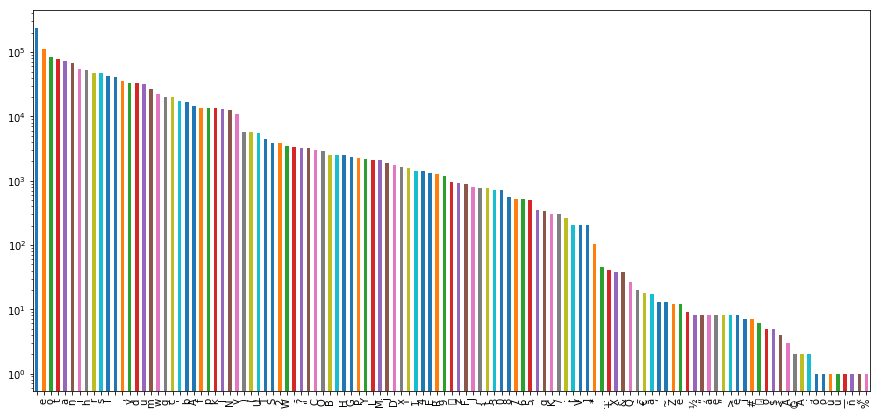

In [9]:
%%time 

bestand='prince_lyrics.csv'  # Ook in maartenmarx.nl/teaching/DataScience/Data


def teldeletters(bestand):
    '''Telt hoe vaak elke letter voorkomt in bestand en toont dat als een pandas series omgekeerd geordend
    op het aantal voorkomens.'''
    from collections import defaultdict

    telling=defaultdict(int)

    with open(bestand) as f:
        for l in f:
            for c in list(l):
                telling[c]+=1
    tellingseries=pd.Series(telling).sort_values(ascending=False)            
    return tellingseries

teldeletters(bestand).plot(kind='bar', figsize=(15,7), logy=True);

# prince lyrics

In [13]:
''' 1. Hoeveel nummers bevatten het woord _sex_ (met of zonder hoofdletter)?
    2. Hoeveel nummers beginnen me dat woord?
    3. Hoeveel nummers bevatten een woord dat _sex_ bevat maar niet 
    gelijk is een _sex_ (dus _sexy_ wel maar _sex_ niet).
    4. Print al die woorden uit die _sex_ bevatten.
    5. Vindt alle woorden in zijn songs die bestaan uit gewone letters en andere tekens (iets als U2 of 4U).
'''

# preproces
prince= pd.read_csv(bestand)
prince.text=prince.text.astype(str)
prince.head()

X                                               text  artist  song  \
0   49  All 7 and we'll watch them fall\nThey stand in...  prince     7   
1  669  319, 'bout time, come in, ow, 319\nTake off yo...  prince   319   
2   78  Don't worry, I won't hurt you\nI only want you...  prince  1999   
3  475  Prince\nMiscellaneous\n2020\nThe year is 2020 ...  prince  2020   
4  811  One mix, one mix, one mix, one mix\nOne mix, o...  prince  3121   

     year        album  Release.Date US.Pop US.R.B   CA   UK   IR   NL   DE  \
0  1992.0       Symbol  17 Nov. 1992      7     61    3   27    -   28   77   
1     NaN          NaN           NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN   
2  1982.0         1999  24 Sep. 1982     12      4    6   25   21   13   86   
3     NaN  Other Songs           NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN   
4  2006.0         3121  21 Mar. 2006      1      1    5    9   23    3    4   

    AT   FR   JP   AU   NZ  peak  
0    -   53    -   25   12   3.0  
1  NaN  NaN  NaN  NaN  NaN   NaN  
2    -    -    -    2    4   2.0  
3  NaN  NaN  NaN  NaN  NaN   NaN  
4   15    8    ?   18    -   1.0

In [10]:
print(prince.text.str.contains(r'\b[Ss]ex\b').sum()) # wat gebeurt er als je de \b's weghaalt?
print(prince.text.str.contains(r'^[Ss]ex\b').sum(),
      prince.text.str.startswith('Sex ').sum() + prince.text.str.startswith('sex ').sum() 
     )
#3
ef= prince.text.str.findall(r'[Ss]ex\w+') 
print(ef[ef.str.len()>0].head(10))
print(ef[ef.str.len()>0].count())
#4
from collections import Counter
print(Counter([s for l in ef.values for s in l]))
#5

50
1 1
10                [sexy]
14                [sexy]
21          [sexy, sexy]
40                [sexi]
47                [sexy]
56           [sexuality]
60          [sexy, sexy]
61    [sexy, sexy, sexy]
79            [sexiness]
80            [sexiness]
Name: text, dtype: object
58
Counter({'sexy': 169, 'Sexy': 87, 'sexual': 10, 'Sexuality': 9, 'sexuality': 2, 'sexiness': 2, 'sexually': 2, 'sexi': 1, 'sexier': 1, 'sexe': 1, 'Sexual': 1, 'sexed': 1})


In [11]:
# Alleen woorden die zowel een letter als een cijfer bevatten en alleen daar uit bestaan. 
# Dit kan beter
ef= prince.text.str.findall(r'\b[A-Za-z0-9]*[0-9]+[A-Za-z0-9]*[A-Za-z][A-Za-z0-9]*\b | \b[A-Za-z0-9]*[A-Za-z][A-Za-z0-9]*[0-9][A-Za-z0-9]*\b')
print(ef[ef.str.len()>0].head(10))
print(Counter([s for l in ef.values for s in l]))

3                                    [ Love4OneAnother]
9                                              [4ever ]
10                                                [ b4]
12                                   [ Love4oneanother]
18    [20th , 20th , 20th , 20th , 20th , 20th , 20t...
20                                           orrow ]
23                                   [3rd , 3rd , 3rd ]
32                                             [4ever ]
35                                              [11th ]
36                                               [3rd ]
Name: text, dtype: object
Counter({'2night ': 55, '2gether ': 32, '4ever ': 16, '1st ': 9, '2day ': 9, '20th ': 8, ' un2': 8, '4th ': 7, '14th ': 7, '3rd ': 6, ' b4': 5, '7th ': 4, ' in2': 4, '2morrow ': 3, '13th ': 2, '2nd ': 2, '21st ': 2, ' B4': 2, ' Un2': 2, ' Love4OneAnother': 1, ' Love4oneanother': 1, '11th ': 1, '12th ': 1, '9th ': 1, '16th ': 1, '8th ': 1, '25th ': 1, '18th ': 1, '10th ': 1, ' x2': 1, ' CD5': 1, '4evers ': 1, '5th 

In [12]:
# percentage klinkers

(100* prince.text.str.findall(r'[AEIOUYaeiouy]').str.len()/prince.text.str.len()).describe()

count    824.000000
mean      31.655525
std        2.864302
min       14.847162
25%       30.004708
50%       31.677154
75%       33.420572
max       45.539906
Name: text, dtype: float64

# Baby names

1. Hoeveel kinderen zijn er per jaar geboren? Maak een mooi plotje erbij.
2. Hoveel kinderen zijn er per jaar per gelscaht geboren? 
3. In welke jaren is het aantal geboortes gestegen ten opzichte van vorig jaar?
    * HINT: groupby, reindex twee keer, de tweede keer met de index 1 verschoven, join, en vergelijk

In [4]:
baby=pd.read_csv('../../Data/babynames.csv')
baby.head()

Name Sex  Count  Year
0       Mary   F   7065  1880
1       Anna   F   2604  1880
2       Emma   F   2003  1880
3  Elizabeth   F   1939  1880
4     Minnie   F   1746  1880

count    1.310000e+02
mean     2.461090e+06
std      1.384829e+06
min      1.927030e+05
25%      1.062332e+06
50%      2.821291e+06
75%      3.667203e+06
max      4.199410e+06
Name: Count, dtype: float64

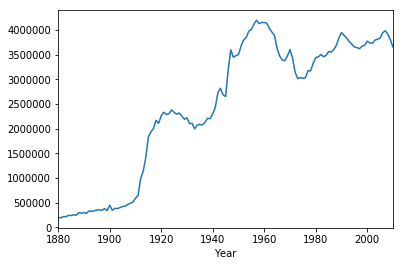

In [5]:
#1
perjaar=baby.groupby('Year')['Count'].sum()
perjaar.plot();
perjaar.describe()

Sex               F             M
count  1.310000e+02  1.310000e+02
mean   1.221299e+06  1.239791e+06
std    6.460013e+05  7.401079e+05
min    9.099300e+04  1.007480e+05
25%    5.911280e+05  4.712040e+05
50%    1.394891e+06  1.426400e+06
75%    1.768764e+06  1.900241e+06
max    2.043983e+06  2.155427e+06

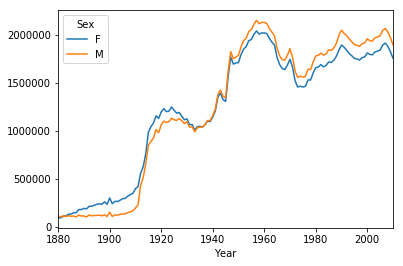

In [6]:
#2
perjaar=baby.pivot_table(index='Year', columns='Sex', values='Count', aggfunc=sum)
perjaar.plot();
perjaar.describe()

In [5]:
# 3. In welke jaren is het aantal geboortes gestegen ten opzichte van vorig jaar?

perjaar=baby.groupby('Year')['Count'].sum()

perjaar['Year']= perjaar.index

perjaar[:15]

Year
1880    201486
1881    192703
1882    221538
1883    216954
1884    243466
1885    240858
1886    255323
1887    247395
1888    299488
1889    288959
1890    301403
1891    286684
1892    334388
1893    325227
1894    338698
Name: Count, dtype: object

(1.4358194341644865, 322402727, True)

In [59]:
# en de mediaan?  Hint: denk eens aan cumsum()
half= n/2
print(half)
print(lengte_distributie.cumsum())  # het juiste antwoord is dus 5 (de laatste waarde waar het onwaar is)
(half< lengte_distributie.cumsum()).idxmax() -1

161201363.5
Naamslengte
2        322694
3       8186307
4      53373458
5     134219521
6     217469552
7     284824039
8     308188669
9     319135310
10    320336064
11    322377503
12    322390930
13    322398872
14    322401934
15    322402727
Name: Count, dtype: int64


5

In [60]:
# en de modus?
lengte_distributie.idxmax()

6

count     131.000000
mean     1412.671756
std      1203.635502
min        63.000000
25%       228.500000
50%      1352.000000
75%      2098.000000
max      4449.000000
Name: Count, dtype: float64

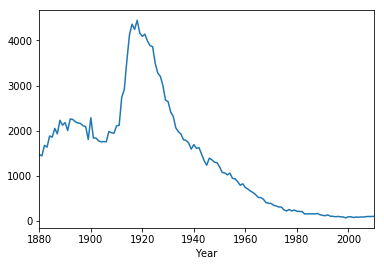

In [183]:
# Maak een plotje van het percentage kinderen van geslacht sex en met naam naam door de jaren heen.

def plot_per_jaar(sex, naam,absolute=True):
    keuze= baby[(baby.Sex==sex)& (baby.Name==naam)]
    perjaar= keuze.groupby('Year')['Count'].sum()
    if not absolute:
        noemer=baby[(baby.Sex==sex)].groupby('Year')['Count'].sum()
        perjaar=perjaar/noemer
    perjaar.plot();
    return perjaar

plot_per_jaar('F','Ida', absolute=True).describe()

In [185]:
# Echte uitdaging! 

# Maak deze functie af.
# Lastig, want rank() is een wat gekke functie.
# Een alternatief is natuurlijk om te sorteren, en een rank kolom met natuurlijke getallen toe te voegen
# Je krijgt wel net andere waardes dan met de default rank() functie

def rank(Naam,Jaar,Geslacht):
    '''De hoeveel populairste naam is Naam in jaar Jaar voor geslacht Geslacht?
    De meest populaire naam krijgt rank 1.'''
    tweed= baby[(baby.Year==Jaar)&(baby.Sex==Geslacht)] 
    tweed['rank']= (tweed.Count.max()-tweed.Count).rank()
    return tweed[tweed.Name==Naam]['rank'].values[0]

print(rank('Ida',2000,'F'))

def rank2(Naam,Jaar,Geslacht):
    '''De hoeveel populairste naam is Naam in jaar Jaar voor geslacht Geslacht?
    De meest populaire naam krijgt rank 1.'''
    tweed= baby[(baby.Year==Jaar)&(baby.Sex==Geslacht)] 
    tweed.sort_values('Count', ascending=False)
    tweed['rank']= range(1,tweed.shape[0]+1)
    return tweed[tweed.Name==Naam]['rank'].values[0]

print(rank2('Ida',2000,'F'))

/Users/admin/anaconda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


1928.0
1925


/Users/admin/anaconda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


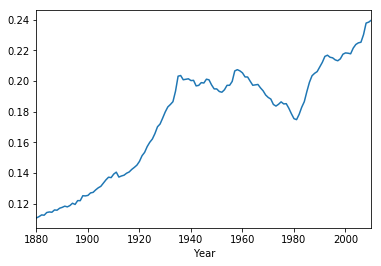

In [186]:
# Welk deel van alle babies heeft een y in zijn/haar naam?
# We willen een grafiek met op de x-as de jaren en op de y-as dit deel voor het jaar op de x-as.
#  Ingedienten: str functie, groupby, sum, vector arithmetic


t= baby[baby.Name.str.contains(r'[yY]')].groupby('Year')['Count'].sum()
n= baby.groupby('Year')['Count'].sum()

(t/n).plot();

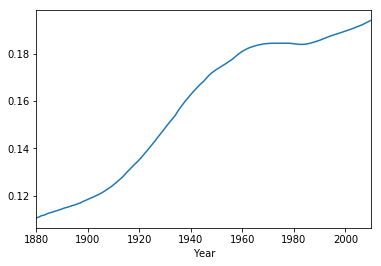

In [109]:
# Net als de vorige maar nu willen we voor elk jaar het deel van de babies met een y of Y voor alle jaren tot nu toe.
# Hint denk aan cumsum()

(t.cumsum()/n.cumsum()).plot();

Sex
F    1.0
M    1.0
dtype: float64


Sex          F         M
Name                    
A     0.092549  0.064266
B     0.050688  0.045504
C     0.075231  0.072009
D     0.059183  0.084344
E     0.055090  0.039881

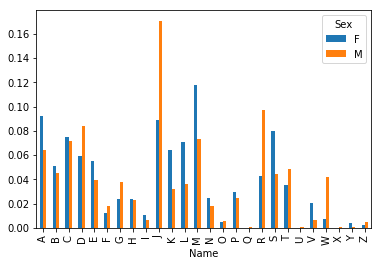

In [12]:
# Welke namen zijn nooit aan jongens gegeven?

## alle unieke namen
print(len(set(baby.Name.unique())))

## de echt meisjes namen
meiden= set(baby.Name.unique())- set( baby[baby.Sex=='M'].groupby('Name')['Count'].sum().index)
print(len(meiden))
## hoeveel procent van de namen is dat?
print(100* len(meiden)/len(set(baby.Name.unique())))
## Hoeveel procent van de kinderen heeft zo'n naam?
100* baby[baby.Name.isin(meiden)].Count.sum()/baby.Count.sum()
## Wat concludeer je?
# Zelfs bij een naam als Ida of Mary zijn er nog best veel kinderen als jongen geregistreerd.
print('Ida' in meiden, baby[(baby.Name=='Ida')& (baby.Sex=='M')][:10])
print('Mary' in meiden, baby[(baby.Name=='Mary')& (baby.Sex=='M')][:10])

88496
51754
58.48173928765142
False       Name Sex  Count  Year
1653   Ida   M      8  1880
3877   Ida   M      5  1881
5973   Ida   M      5  1882
8081   Ida   M      5  1883
10044  Ida   M      8  1884
12518  Ida   M      6  1885
14743  Ida   M      8  1886
17089  Ida   M      9  1887
19545  Ida   M     13  1888
22383  Ida   M      8  1889
False        Name Sex  Count  Year
1273   Mary   M     27  1880
3238   Mary   M     29  1881
5277   Mary   M     30  1882
7407   Mary   M     32  1883
9610   Mary   M     36  1884
11910  Mary   M     38  1885
14323  Mary   M     32  1886
16671  Mary   M     47  1887
19223  Mary   M     50  1888
21893  Mary   M     41  1889
